# Estimation of COVID-19 Pandemic - Ước tính sự lây lan đại dịch COVID-19

## Loading Data - Nhận dữ liệu

Chúng tôi sẽ sử dụng dữ liệu về những cá nhân bị nhiễm COVID-19 được cung cấp bởi [Center for Systems Science and Engineering](https://systems.jhu.edu/) (CSSE) của [Johns Hopkins University](https://jhu.edu/). Nguồn dữ liệu có trên trang [GitHub Repository](https://github.com/CSSEGISandData/COVID-19).

In [55]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # thiết lập kích thước biểu đồ dạng lớn

Chúng ta có thể tải dữ liệu mới nhất trực tiếp từ GitHub bằng cách sử dụng lệnh `pd.read_csv`. Nếu vì lý do nào đó mà dữ liệu không khả dụng, bạn có thể sử dụng bản sao có sẵn cục bộ trong thư mục dữ liệu - chỉ cần bỏ chú thích vào dòng bên dưới định nghĩa `base_url`:

In [56]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

Chúng ta bắt đầu bằng việc tải dữ liệu về những cá nhân bị nhiễm Covid-19 và xem qua dữ liệu trông như thế nào:

In [57]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


Trong dữ liệu trên, mỗi hàng của bảng là số lượng cá nhân bị nhiễm bệnh (infected) ở mỗi quốc gia hoặc bang, và các cột tương ứng với ngày. Và tương tự cho các dữ liệu khác, chẳng hạn như số người hồi phục (recovered) và số người tử vong (deaths).

In [58]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


## Making Sense of the Data - Làm rõ ý nghĩa của dữ liệu

Từ bảng trên, vai trò của cột Tỉnh/bang không rõ ràng vì không phải dòng nào cũng có dữ liệu. Hãy dùng hàm `count` để xem các giá trị khác nhau có trong cột Tỉnh/Tiểu bang:

In [41]:
infected['Province/State'].value_counts()

,count
Province/State,
Australian Capital Territory,1
Saint Pierre and Miquelon,1
Reunion,1
New Caledonia,1
Mayotte,1
...,...
Gansu,1
Fujian,1
Chongqing,1


In [26]:
# Lọc các hàng có giá trị khác NaN trong cột 'Province/State'
filtered_df = infected[infected['Province/State'].notnull()][['Province/State', 'Country/Region']]

# Hiển thị kết quả
print(filtered_df)


                                   Province/State  Country/Region
9                    Australian Capital Territory       Australia
10                                New South Wales       Australia
11                             Northern Territory       Australia
12                                     Queensland       Australia
13                                South Australia       Australia
..                                            ...             ...
273                                        Jersey  United Kingdom
274                                    Montserrat  United Kingdom
275                              Pitcairn Islands  United Kingdom
276  Saint Helena, Ascension and Tristan da Cunha  United Kingdom
277                      Turks and Caicos Islands  United Kingdom

[91 rows x 2 columns]


In [27]:
# Lấy danh sách quốc gia duy nhất mà có thông tin Province/State
infected[infected['Province/State'].notnull()]['Country/Region'].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'New Zealand', 'United Kingdom'], dtype=object)

Chúng ta thấy rằng có 8 quốc gia như Australia, United Kingdom và China... có sự phân chia chi tiết hơn theo tỉnh. Chúng ta hãy tìm thông tin về Trung Quốc để xem ví dụ:

In [28]:
infected[infected['Country/Region']=='China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,40774,40774,40774,40774,40774,40774,40774,40774,40774,40774
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,14715,14715,14715,14715,14715,14715,14715,14715,14715,14715
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,17122,17122,17122,17122,17122,17122,17122,17122,17122,17122
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742
64,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,103248,103248,103248,103248,103248,103248,103248,103248,103248,103248
65,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,13371,13371,13371,13371,13371,13371,13371,13371,13371,13371
66,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,2534,2534,2534,2534,2534,2534,2534,2534,2534,2534
67,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,10483,10483,10483,10483,10483,10483,10483,10483,10483,10483
68,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,3292,3292,3292,3292,3292,3292,3292,3292,3292,3292


## Pre-processing the Data - Tiền xử lý dữ liệu

Chúng ta không quan tâm đến việc chia nhỏ các quốc gia thành nhiều vùng lãnh thổ hơn, do đó trước tiên cần phải loại bỏ sự phân chia này và cộng thông tin về tất cả các vùng lãnh thổ lại với nhau để có thông tin cho toàn bộ quốc gia. Hãy sử dụng hàm `groupby`:

In [59]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


Chúng ta có thể xem dữ liệu cho một quốc gia cụ thể bằng cách sử dụng hàm `.loc`:

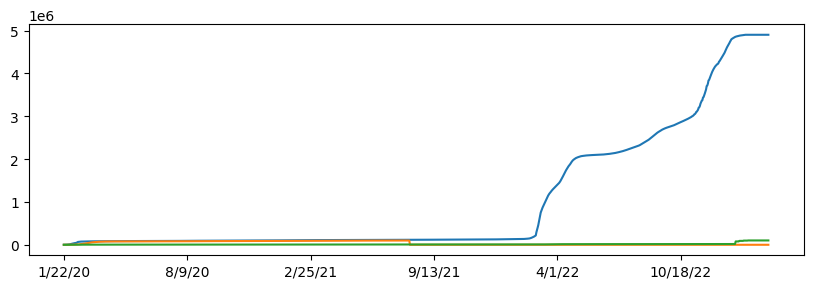

In [60]:
infected.loc['China'][3:].plot()
recovered.loc['China'][3:].plot()
deaths.loc['China'][3:].plot()
plt.show()

> **Note** how we use `[3:]` để xóa ba cột tử đầu tiên của một chuỗi chứa tỉnh, vị trí địa lý của một quốc gia. Ngoài ra, ta cũng có thể xóa hoàn toàn ba cột `Province/State`, `Lat` và `Long` bằng hàm `drop`:

In [61]:
infected.drop(columns=['Province/State','Lat','Long'],inplace=True)
recovered.drop(columns=['Province/State','Lat','Long'],inplace=True)
deaths.drop(columns=['Province/State','Lat','Long'],inplace=True)

## Investigating the Data - Nghiên cứu dữ liệu

Bây giờ chúng ta hãy chuyển sang nghiên cứu một quốc gia cụ thể. Hãy tạo một dataframe về các ca nhiễm được lập theo ngày.

In [62]:
print(infected.info())
infected.head()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, Afghanistan to Zimbabwe
Columns: 1143 entries, 1/22/20 to 3/9/23
dtypes: int64(1143)
memory usage: 1.8+ MB
None


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [66]:
# Gộp 3 dataframe thành 1 bảng phân tích cho 1 quốc gia cụ thể
def mkframe(country):
    """
    Tạo DataFrame tổng hợp dữ liệu COVID-19 cho một quốc gia cụ thể.

    Args:
        country (str): Tên quốc gia cần tổng hợp dữ liệu.

    Returns:
        pd.DataFrame: DataFrame chứa dữ liệu infected, recovered, deaths với index datetime.
    """
    try:
        # Lọc dữ liệu theo quốc gia và chuyển index sang dạng datetime
        df = pd.concat([
            infected.loc[country].T,
            recovered.loc[country].T,
            deaths.loc[country].T
        ], axis=1)

        # Đặt tên cột
        df.columns = ['infected', 'recovered', 'deaths']

        # Chuyển index sang datetime
        df.index = pd.to_datetime(df.index, format='%m/%d/%y', errors='coerce')

        # Loại bỏ các hàng có index là NaT
        df = df.dropna(subset=['infected', 'recovered', 'deaths'])

        return df

    except KeyError:
        print(f"❌ Quốc gia '{country}' không tồn tại trong dữ liệu.")
        return pd.DataFrame()

# Ví dụ sử dụng hàm
df_china = mkframe('China')
print('\nDataFrame for China:')
print(df_china.head())

df_us = mkframe('US')
print('\nDataFrame for US:')
print(df_us.head())




DataFrame for China:
            infected  recovered  deaths
2020-01-22       548         28      17
2020-01-23       643         30      18
2020-01-24       920         36      26
2020-01-25      1406         39      42
2020-01-26      2075         49      56

DataFrame for US:
            infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0


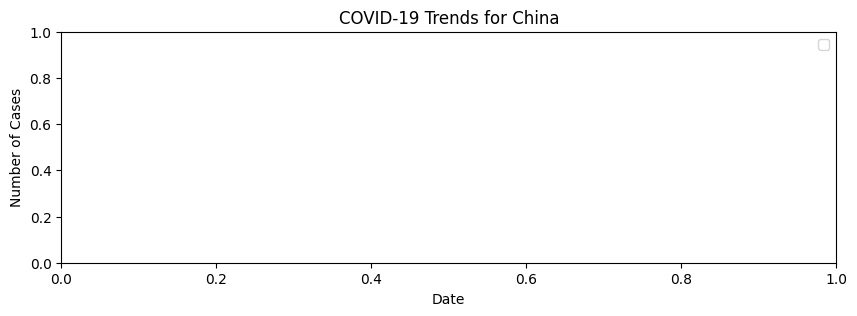

In [82]:
# Vẽ biểu đồ xu hướng
import matplotlib.pyplot as plt

df_us = mkframe('China')
plt.title('COVID-19 Trends for China')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(['Infected', 'Recovered', 'Deaths'])
plt.show()


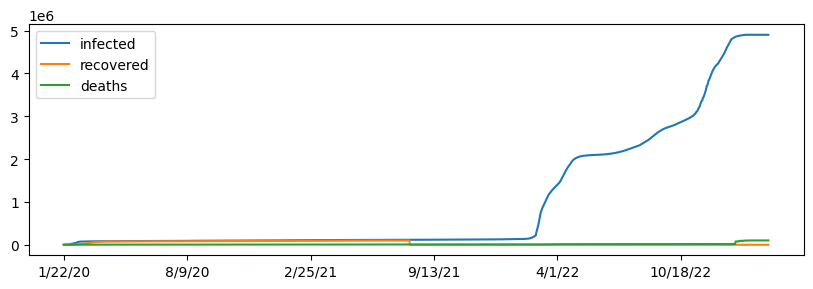

In [68]:
df.plot()
plt.show()

Bây giờ chúng ta hãy tính số người nhiễm mới mỗi ngày. Điều này sẽ cho phép chúng ta thấy tốc độ tiến triển của đại dịch. Ngày dễ nhất để thực hiện là sử dụng hàm `diff` để tính số chênh lệch giữa ngày n so với ngày liền trước:

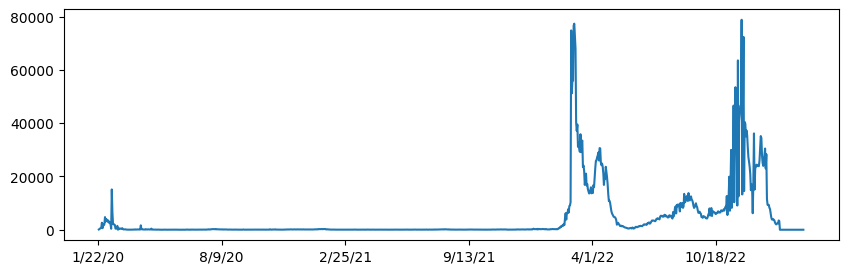

In [73]:
# Tính số ca nhiễm mới mỗi ngày
df['new_infected'] = df['infected'].diff()

df['new_infected'].plot()
plt.show()

Chúng ta có thể thấy dữ liệu có biến động lớn. Hãy cùng xem xét kỹ hơn một trong những tháng sau:

In [76]:
# Kiểm tra định dạng của df.index xem có phải là DateTimeIndex không
print(df.index)
print(df.index.dtype)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1143)
object


In [78]:
# Chuyển index sang datetime với định dạng '%m/%d/%y' (01/22/20)
df.index = pd.to_datetime(df.index, format='%m/%d/%y', errors='coerce')

# Kiểm tra lại index
print(df.index.dtype)


datetime64[ns]


In [79]:
# Lọc dữ liệu cho tháng 7 năm 2020
df_july_2020 = df[(df.index.year == 2020) & (df.index.month == 7)]

# Kiểm tra dữ liệu lọc được
print(df_july_2020.head())


            infected  recovered  deaths  ninfected  new_infected
2020-07-01     88344      79650    4713       33.0          33.0
2020-07-02     88360      79665    4713       16.0          16.0
2020-07-03     88372      79680    4713       12.0          12.0
2020-07-04     88395      79706    4713       23.0          23.0
2020-07-05     88415      79718    4713       20.0          20.0


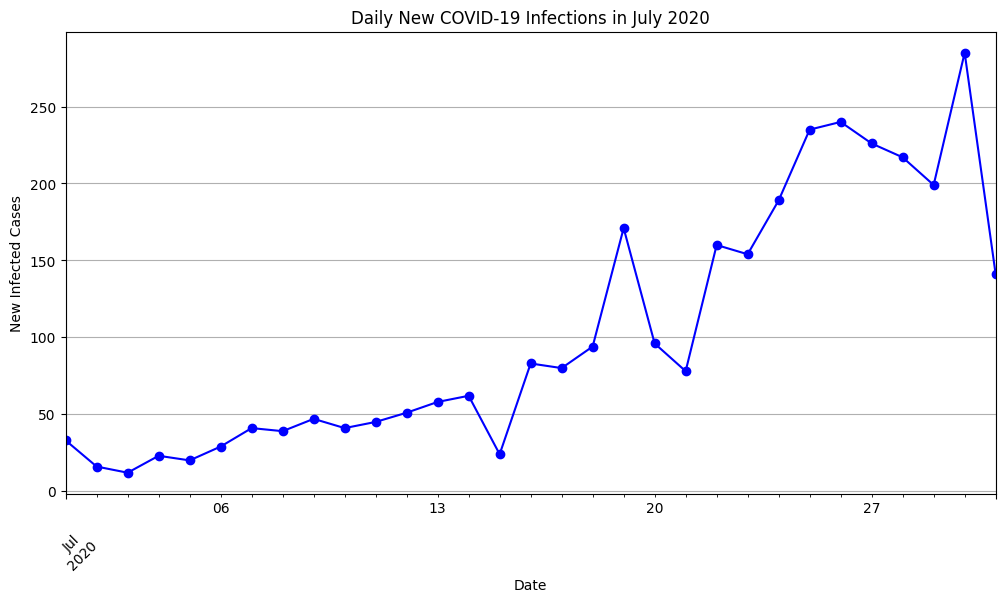

In [80]:
# Vẽ biểu đồ
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_july_2020['new_infected'].plot(marker='o', linestyle='-', color='b')
plt.title('Daily New COVID-19 Infections in July 2020')
plt.xlabel('Date')
plt.ylabel('New Infected Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Rõ ràng là có sự biến động hàng tuần trong dữ liệu. Bởi vì chúng ta muốn có thể thấy được xu hướng, nên việc làm mịn đường cong bằng cách tính toán trung bình đang chạy là hợp lý (tức là mỗi ngày chúng ta sẽ tính giá trị trung bình của nhiều ngày trước đó):

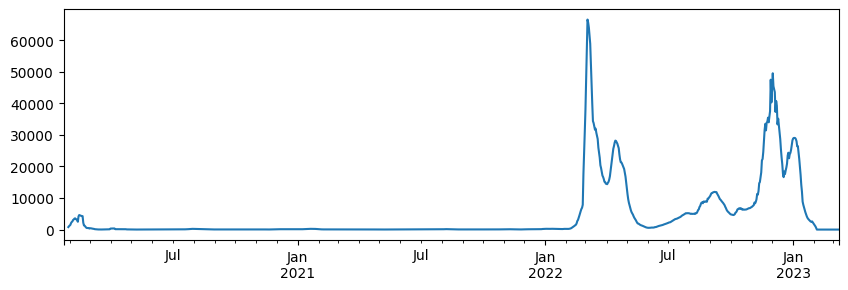

In [81]:
df['ninfav'] = df['new_infected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

Để có thể so sánh nhiều quốc gia, chúng ta có thể muốn tính đến dân số của quốc gia đó và so sánh tỷ lệ cá nhân bị nhiễm bệnh so với dân số của quốc gia đó. Để có được dân số của một quốc gia, chúng ta hãy tải tập dữ liệu của các quốc gia:

In [83]:
countries = pd.read_csv(countries_dataset_url)
countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4317,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4318,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4319,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


Because this dataset contains information on both countries and provinces, to get the population of the whole country we need to be a little bit clever:

In [ ]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
790,840,US,USA,840.0,NaN,NaN,NaN,US,40.0,-100.0,US,329466283.0


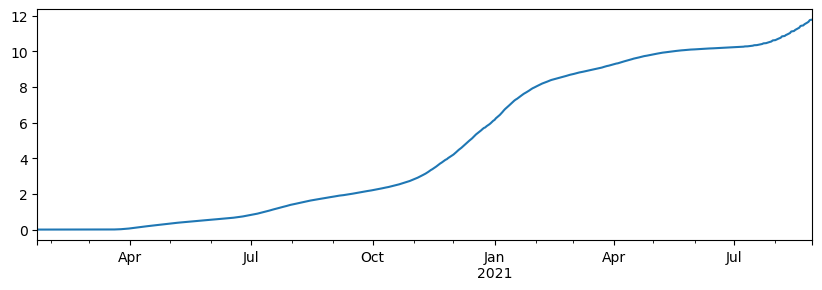

In [ ]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()


## Computing $R_t$

To see how infectious is the disease, we look at the **basic reproduction number** $R_0$, which indicated the number of people that an infected person would further infect. When $R_0$ is more than 1, the epidemic is likely to spread.

$R_0$ is a property of the disease itself, and does not take into account some protective measures that people may take to slow down the pandemic. During the pandemic progression, we can estimate the reproduction number $R_t$ at any given time $t$. It has been shown that this number can be roughly estimated by taking a window of 8 days, and computing $$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
where $I_t$ is the number of newly infected individuals on day $t$.

Let's compute $R_t$ for our pandemic data. To do this, we will take a rolling window of 8 `ninfected` values, and apply the function to compute the ratio above:

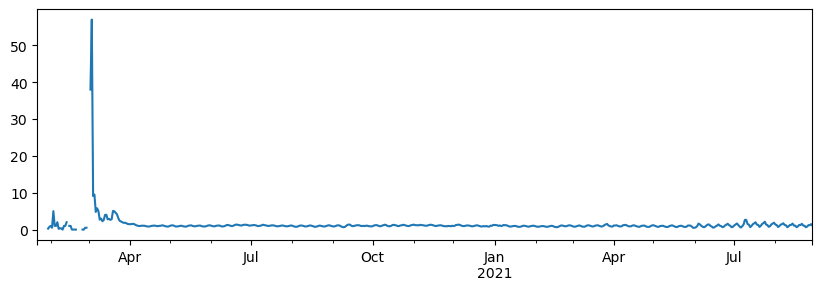

In [ ]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

You can see that there are some gaps in the graph. Those can be caused by either `NaN`, if  `inf` values being present in the dataset. `inf` may be caused by division by 0, and `NaN` can indicate missing data, or no data available to compute the result (like in the very beginning of our frame, where rolling window of width 8 is not yet available). To make the graph nicer, we need to fill those values using `replace` and `fillna` function.

Let's further look at the beginning of the pandemic. We will also limit the y-axis values to show only values below 6, in order to see better, and draw horizontal line at 1.

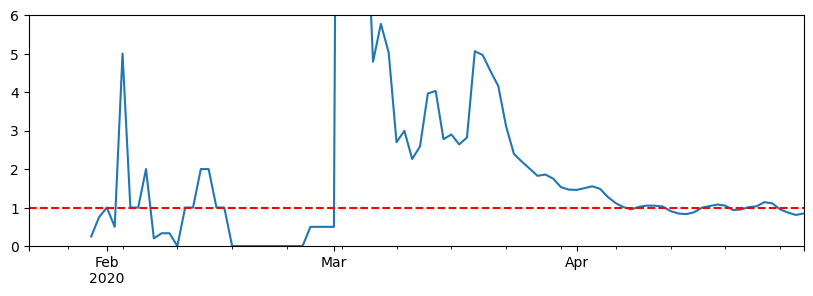

In [ ]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

Another interesting indicator of the pandemic is the **derivative**, or **daily difference** in new cases. It allows us to see clearly when pandemic is increasing or declining.

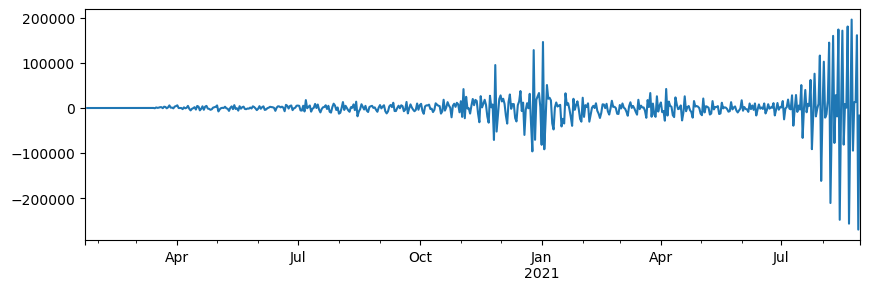

In [ ]:
df['ninfected'].diff().plot()
plt.show()

Given the fact that there are a lot of fluctuations in data caused by reporting, it makes sense to smooth the curve by running rolling average to get the overall picture. Let's again focus on the first months of the pandemic:

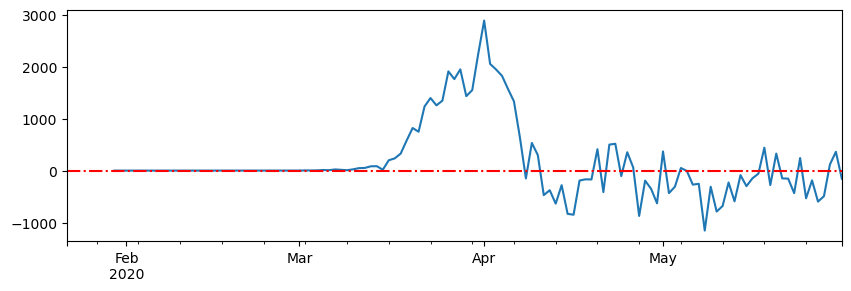

In [ ]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()


## Challenge

Now it is time for you to play more with the code and data! Here are a few suggestions you can experiment with:
* See the spread of the pandemic in different countries.
* Plot $R_t$ graphs for several countries on one plot for comparison, or make several plots side-by-side
* See how the number of deaths and recoveries correlate with number of infected cases.
* Try to find out how long a typical disease lasts by visually correlating infection rate and deaths rate and looking for some anomalies. You may need to look at different countries to find that out.
* Calculate the fatality rate and how it changes over time. You may want to take into account the length of the disease in days to shift one time series before doing calculations

## References

You may look at further studies of COVID epidemic spread in the following publications:
* [Sliding SIR Model for Rt Estimation during COVID Pandemic](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), blog post by [Dmitry Soshnikov](http://soshnikov.com)
* T.Petrova, D.Soshnikov, A.Grunin. [Estimation of Time-Dependent Reproduction Number for Global COVID-19 Outbreak](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [Code for the above paper on GitHub](https://github.com/shwars/SlidingSIR)